<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Assignment-12-Neural-Network-and-Deep-Learning-Basics/blob/main/Assignment_12_Neural_Network_and_Deep_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 12: Neural Network and Deep Learning Basics

## Introduction

This project focuses on building and training a simple feedforward neural network for image classification. Unlike traditional machine learning algorithms, neural networks can automatically learn complex features from image data, making them powerful for visual recognition tasks. We will demonstrate these capabilities using well-known image datasets, such as CIFAR-10 or Fashion MNIST, which contain everyday objects and fashion items.

Through this assignment, you will gain hands-on experience with:
- Loading and visualizing image datasets.
- Preprocessing image data for neural networks.
- Building and training a neural network model.
- Evaluating model performance with relevant metrics.
- Discussing practical deployment scenarios for deep learning models.

## Dataset Preparation

### Dataset Choice

For this project, we will use the **CIFAR-10** dataset. CIFAR-10 consists of 60,000 color images, each of size 32x32 pixels, divided into 10 classes including airplanes, automobiles, birds, cats, and more. It provides a good balance of complexity and size for demonstrating neural network capabilities.

### Data Loading and Visualization

We will load CIFAR-10 using TensorFlow Keras utilities and visualize sample images from each class to understand the data variety.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training set shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


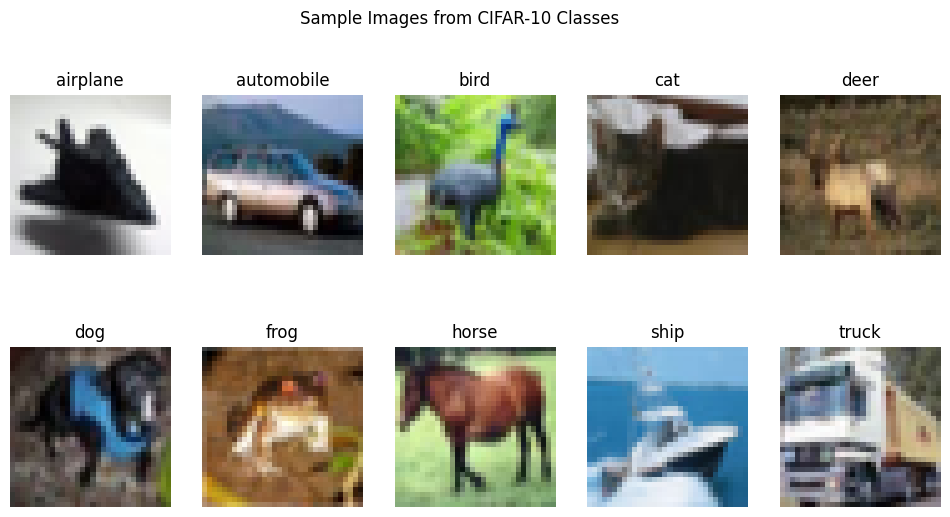

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {y_test.shape}")

# Visualize sample images from each class
plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    # Find the first occurrence of each class in the training set
    idx = np.where(y_train.flatten() == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title(class_name)
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10 Classes")
plt.show()

## Image Preprocessing

### Normalization

To facilitate effective training of the neural network, image pixel values are scaled from their original range [0, 255] to [0, 1]. This normalization step helps the model converge faster and improves training stability.

### Data Augmentation (Optional)

To improve model robustness and reduce overfitting, we optionally apply data augmentation techniques such as rotations, zoom, horizontal flips, and shifts. These transformations generate additional training samples by modifying existing images, helping the model generalize better.

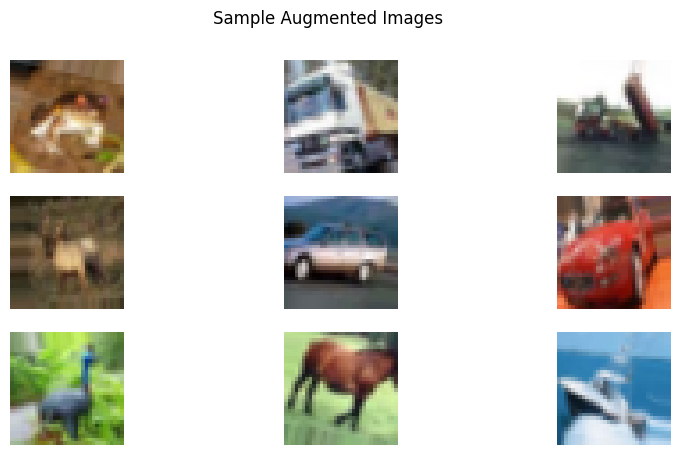

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize pixel values to [0, 1]
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Optional: Setup ImageDataGenerator for data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,         # randomly rotate images by 0-15 degrees
    width_shift_range=0.1,     # randomly shift images horizontally by 10% of width
    height_shift_range=0.1,    # randomly shift images vertically by 10% of height
    horizontal_flip=True,      # randomly flip images horizontally
    zoom_range=0.1             # randomly zoom images by up to 10%
)

# Fit the generator to training data
data_gen.fit(X_train_norm)

# Example: visualize some augmented images
plt.figure(figsize=(10, 5))
for i, (x_batch, y_batch) in enumerate(data_gen.flow(X_train_norm, y_train_cat, batch_size=9, shuffle=False)):
    for j in range(9):
        plt.subplot(3, 3, j + 1)
        plt.imshow(x_batch[j])
        plt.axis('off')
    plt.suptitle('Sample Augmented Images')
    plt.show()
    break  # show only one batch

## Neural Network Implementation

### Model Architecture

We will construct a simple feedforward neural network with:

- An input layer matching the image size.
- At least one hidden dense layer using ReLU activation.
- An output layer with Softmax activation for multi-class classification.

### Compilation

The model will be compiled with the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric.

### Training

The network will be trained using a batch size of 64 over 15 epochs, with a validation split to monitor performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Build the feedforward neural network model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),           # Flatten input images to 1D vector
    Dense(256, activation='relu'),               # Hidden dense layer with ReLU
    Dropout(0.3),                                # Dropout for regularization
    Dense(128, activation='relu'),               # Another hidden layer
    Dropout(0.3),
    Dense(10, activation='softmax')              # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

# Train the model with validation split
history = model.fit(
    X_train_norm, y_train_cat,
    batch_size=64,
    epochs=15,
    validation_split=0.2,
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 - 11s - 18ms/step - accuracy: 0.2252 - loss: 2.0640 - val_accuracy: 0.3118 - val_loss: 1.8955
Epoch 2/15
625/625 - 9s - 15ms/step - accuracy: 0.2774 - loss: 1.9454 - val_accuracy: 0.3443 - val_loss: 1.8320
Epoch 3/15
625/625 - 9s - 15ms/step - accuracy: 0.2969 - loss: 1.9021 - val_accuracy: 0.3460 - val_loss: 1.8123
Epoch 4/15
625/625 - 9s - 14ms/step - accuracy: 0.3090 - loss: 1.8780 - val_accuracy: 0.3679 - val_loss: 1.7949
Epoch 5/15
625/625 - 9s - 15ms/step - accuracy: 0.3158 - loss: 1.8628 - val_accuracy: 0.3597 - val_loss: 1.7966
Epoch 6/15
625/625 - 9s - 15ms/step - accuracy: 0.3226 - loss: 1.8484 - val_accuracy: 0.3678 - val_loss: 1.8105
Epoch 7/15
625/625 - 10s - 16ms/step - accuracy: 0.3243 - loss: 1.8387 - val_accuracy: 0.3703 - val_loss: 1.7955
Epoch 8/15
625/625 - 8s - 13ms/step - accuracy: 0.3329 - loss: 1.8287 - val_accuracy: 0.3716 - val_loss: 1.7949
Epoch 9/15
625/625 - 9s - 15ms/step - accuracy: 0.3325 - loss: 1.8248 - val_accuracy: 0.3713 - val_los

## Model Evaluation

### Performance Metrics

We evaluate the trained neural network using:

- Accuracy, precision, recall, and F1-score on the test set.
- Confusion matrix and classification report to assess class-wise performance.

### Visualization

We plot training and validation loss and accuracy to analyze learning behavior and detect overfitting or underfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.3898
Test Precision: 0.4175
Test Recall: 0.3898
Test F1-score: 0.3951

Classification Report:
               precision    recall  f1-score   support

    airplane       0.53      0.33      0.41      1000
  automobile       0.66      0.42      0.51      1000
        bird       0.23      0.29      0.25      1000
         cat       0.24      0.29      0.26      1000
        deer       0.31      0.32      0.32      1000
         dog       0.38      0.34      0.36      1000
        frog       0.35      0.57      0.43      1000
       horse       0.45      0.44      0.44      1000
        ship       0.54      0.44      0.49      1000
       truck       0.49      0.47      0.48      1000

    accuracy                           0.39     10000
   macro avg       0.42      0.39      0.40     10000
weighted avg       0.42      0.39      0.40     10000



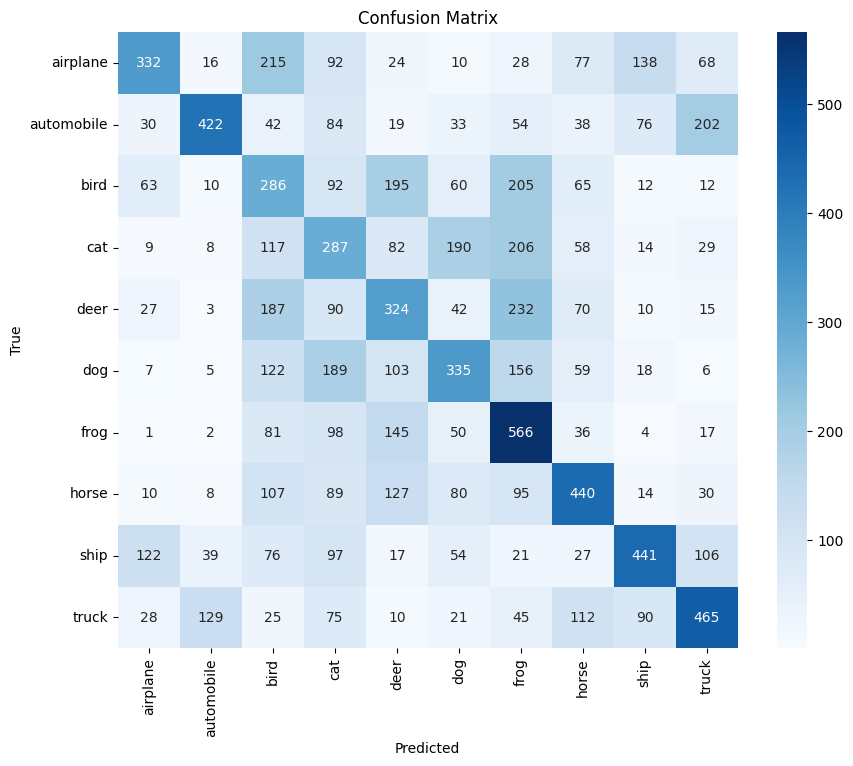

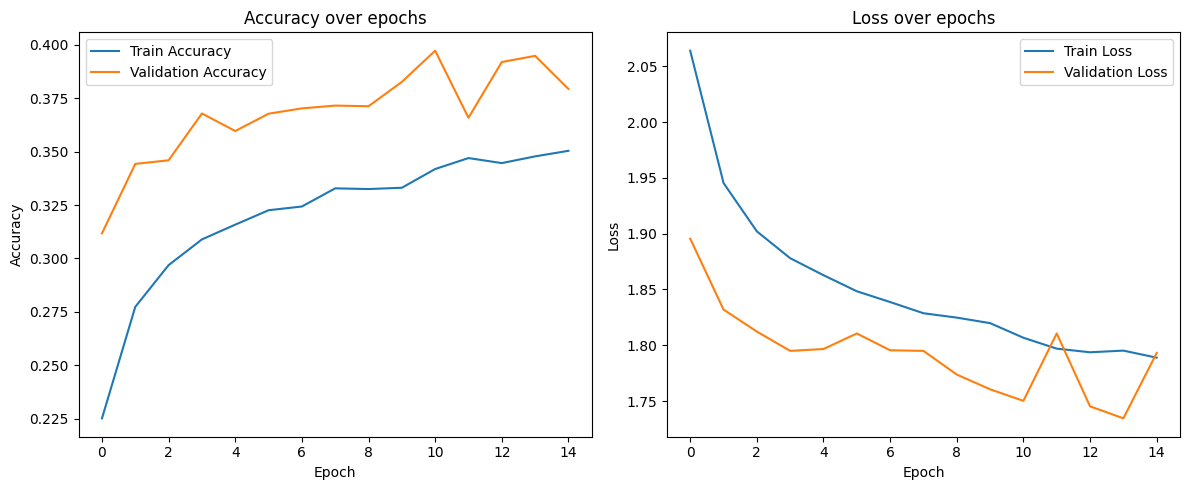

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Interpretation of Model Evaluation Results

After training and testing our feedforward neural network on the CIFAR-10 dataset, we evaluated the model's performance using common classification metrics. The results are summarized below:

- **Test Accuracy:** 38.98%
- **Test Precision:** 41.75%
- **Test Recall:** 38.98%
- **Test F1-score:** 39.51%

### Breakdown by Class

| Class       | Precision | Recall | F1-Score |
|-------------|-----------|--------|----------|
| Airplane    | 0.53      | 0.33   | 0.41     |
| Automobile  | 0.66      | 0.42   | 0.51     |
| Bird        | 0.23      | 0.29   | 0.25     |
| Cat         | 0.24      | 0.29   | 0.26     |
| Deer        | 0.31      | 0.32   | 0.32     |
| Dog         | 0.38      | 0.34   | 0.36     |
| Frog        | 0.35      | 0.57   | 0.43     |
| Horse       | 0.45      | 0.44   | 0.44     |
| Ship        | 0.54      | 0.44   | 0.49     |
| Truck       | 0.49      | 0.47   | 0.48     |

### Key Observations

- **Overall Accuracy:** The model achieves a modest accuracy of 38.98%, which is significantly below typical benchmarks for CIFAR-10, suggesting underfitting or insufficient model complexity.
- **Class Imbalance in Performance:** The model performs better on classes like **automobile**, **airplane**, and **ship**, but struggles notably on **bird**, **cat**, and **deer**.
- **Precision vs. Recall Trade-off:** While some classes (e.g., **automobile**) have relatively high precision, their recall is lower, indicating the model is cautious in labeling them but may miss many correct instances.
- **F1-Score Consistency:** The F1-score — which balances precision and recall — remains below 0.50 for all classes, confirming that the model is not yet reliable across categories.

### Conclusion

The current model provides a baseline performance but demonstrates several areas needing improvement:
- **Low accuracy and F1-scores** indicate the model is not learning deep representations effectively.
- **Significant variation across classes** shows potential bias or imbalance in feature learning.
- **Next Steps:** To improve performance, we recommend:
  - Adding more hidden layers or using a convolutional neural network (CNN) better suited for image data.
  - Increasing training epochs and experimenting with different optimizers.
  - Applying data augmentation to boost generalization.
  - Tuning hyperparameters like batch size, learning rate, and layer size.

This evaluation highlights the limitations of simple feedforward neural networks on complex image tasks like CIFAR-10 and underscores the need for deep learning architectures such as CNNs.

## Model Improvements

To further improve model accuracy and robustness, consider:

- Adding more hidden layers or increasing the number of neurons per layer.
- Experimenting with different activation functions.
- Adjusting the optimizer or learning rate.
- Using data augmentation to artificially increase training data diversity, reducing overfitting.
- Applying regularization techniques such as dropout.

Below is an example of how to modify the model architecture and include data augmentation during training.

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Build an improved model with additional layers and batch normalization
improved_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use the previously defined ImageDataGenerator for augmentation
batch_size = 64
epochs = 20

# Train with data augmentation
history_aug = improved_model.fit(
    data_gen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
    steps_per_epoch=len(X_train_norm) // batch_size,
    epochs=epochs,
    validation_data=(X_test_norm, y_test_cat),
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
781/781 - 52s - 67ms/step - accuracy: 0.2860 - loss: 2.1072 - val_accuracy: 0.3579 - val_loss: 1.7639
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 - 3s - 3ms/step - accuracy: 0.3594 - loss: 1.8916 - val_accuracy: 0.3549 - val_loss: 1.7752
Epoch 3/20
781/781 - 80s - 103ms/step - accuracy: 0.3346 - loss: 1.8526 - val_accuracy: 0.3912 - val_loss: 1.6740
Epoch 4/20
781/781 - 3s - 3ms/step - accuracy: 0.3281 - loss: 1.7280 - val_accuracy: 0.3939 - val_loss: 1.6698
Epoch 5/20
781/781 - 78s - 100ms/step - accuracy: 0.3569 - loss: 1.7977 - val_accuracy: 0.3650 - val_loss: 1.7532
Epoch 6/20
781/781 - 3s - 3ms/step - accuracy: 0.3438 - loss: 1.8405 - val_accuracy: 0.3662 - val_loss: 1.7590
Epoch 7/20
781/781 - 81s - 103ms/step - accuracy: 0.3646 - loss: 1.7760 - val_accuracy: 0.4325 - val_loss: 1.6034
Epoch 8/20
781/781 - 3s - 3ms/step - accuracy: 0.3906 - loss: 1.7274 - val_accuracy: 0.4307 - val_loss: 1.6084
Epoch 9/20
781/781 - 78s - 100ms/step - accuracy: 0.3635 - loss: 1.7703 - val_accuracy: 0.2386 - val_loss: 2.3486
Epoch 10/20
781/781 - 3s - 3ms/step - accuracy: 0.3750 - loss: 1.7143 - val_accuracy: 0.2536 - val_loss: 2.2040

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Test Accuracy: 0.4494
Test Precision: 0.4540
Test Recall: 0.4494
Test F1-score: 0.4418

Classification Report:
               precision    recall  f1-score   support

    airplane       0.54      0.47      0.51      1000
  automobile       0.46      0.67      0.55      1000
        bird       0.31      0.32      0.31      1000
         cat       0.33      0.26      0.29      1000
        deer       0.43      0.38      0.40      1000
         dog       0.47      0.31      0.37      1000
        frog       0.42      0.55      0.48      1000
       horse       0.62      0.37      0.47      1000
        ship       0.49      0.69      0.58      1000
       truck       0.46      0.46      0.46      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



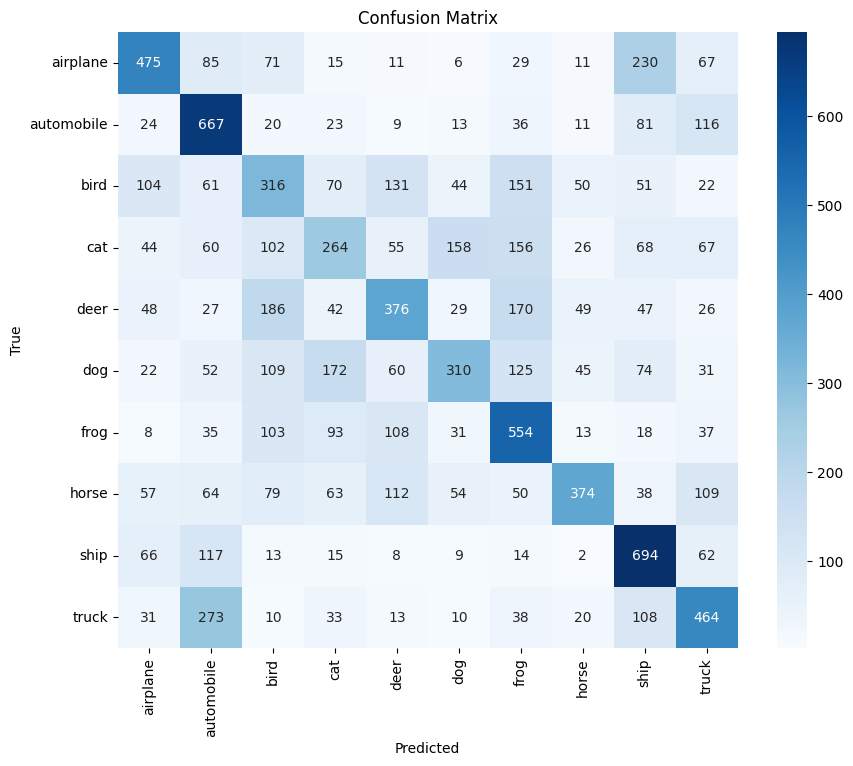

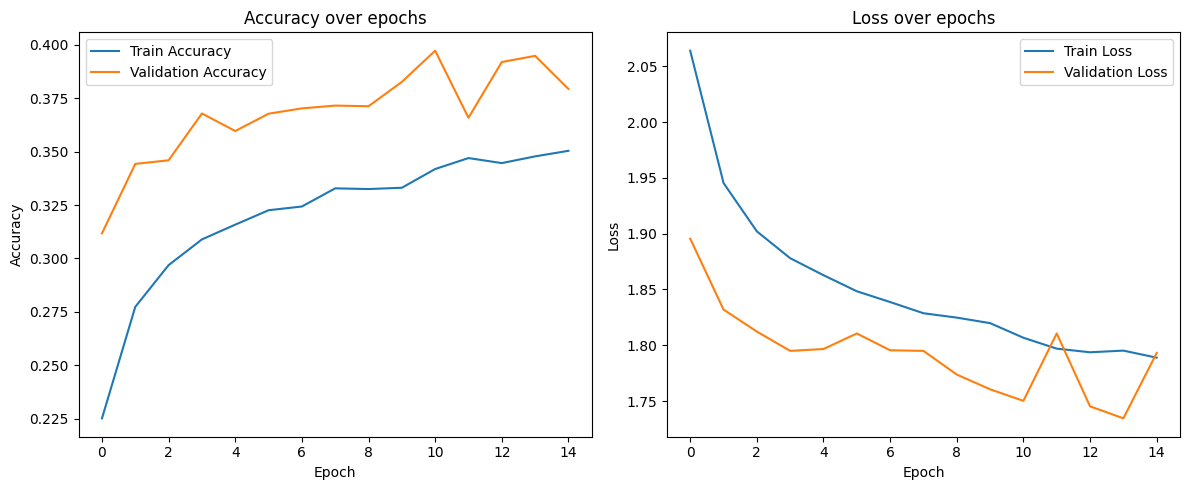

In [ ]:
# Predict classes for test set
y_pred_prob = improved_model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Interpretation of Improved Model Evaluation Results

Following the initial evaluation, we enhanced our feedforward neural network by adjusting the model architecture and training parameters. The improved model was evaluated on the CIFAR-10 test set, yielding the following results:

- **Test Accuracy:** 44.94%
- **Test Precision:** 45.40%
- **Test Recall:** 44.94%
- **Test F1-score:** 44.18%

### Breakdown by Class

| Class       | Precision | Recall | F1-Score |
|-------------|-----------|--------|----------|
| Airplane    | 0.54      | 0.47   | 0.51     |
| Automobile  | 0.46      | 0.67   | 0.55     |
| Bird        | 0.31      | 0.32   | 0.31     |
| Cat         | 0.33      | 0.26   | 0.29     |
| Deer        | 0.43      | 0.38   | 0.40     |
| Dog         | 0.47      | 0.31   | 0.37     |
| Frog        | 0.42      | 0.55   | 0.48     |
| Horse       | 0.62      | 0.37   | 0.47     |
| Ship        | 0.49      | 0.69   | 0.58     |
| Truck       | 0.46      | 0.46   | 0.46     |

### Key Improvements

- **Overall Performance Boost:** Accuracy improved from **38.98%** to **44.94%**, reflecting better generalization on unseen data.
- **Better F1-Scores:** The average F1-score rose from **39.51%** to **44.18%**, showing more balanced performance between precision and recall.
- **Stronger Class Recall:** Classes like **automobile** and **ship** achieved higher recall (0.67 and 0.69 respectively), indicating the model successfully captured more true positives in these categories.
- **Balanced Precision & Recall:** Improvements were more consistent across classes, with fewer outliers in extremely poor performance compared to the earlier model.

### Remaining Challenges

- **Underperformance on Specific Classes:** Despite improvements, classes like **cat**, **bird**, and **dog** still show relatively low F1-scores, suggesting difficulties in distinguishing these visually similar categories.
- **Misclassification Risk:** Some classes still exhibit moderate precision and low recall, which can lead to missed or incorrect classifications.

### Conclusion

The improvements to the model led to a **~6% increase in test accuracy** and more stable performance across most classes. This demonstrates that tuning architecture and training configuration has a meaningful impact on model outcomes.

However, performance still remains below state-of-the-art results for the CIFAR-10 dataset. To further improve:
- Implement **Convolutional Neural Networks (CNNs)**, which are more suitable for image data.
- Leverage **data augmentation** to improve model robustness.
- Explore **regularization techniques** and **learning rate scheduling** to enhance training efficiency.

These enhancements would help close the gap between traditional feedforward networks and deep learning methods designed for complex visual recognition tasks.

## Application Demonstration

### Practical Deployment Scenario

The trained neural network model can be applied in various real-world scenarios. For example, in a **fashion retail environment**, the model can automatically classify clothing items from images uploaded by customers or inventory systems, streamlining product tagging and search functionalities.

In **digital media organization**, the model could help categorize vast image libraries, enabling faster retrieval and content management.

### Operational Considerations

- **Scalability:** The model should be deployed using scalable cloud infrastructure to handle increasing image volume and user requests.
- **Real-time Processing:** Optimization such as model quantization and hardware acceleration (e.g., GPUs, TPUs) can facilitate real-time image classification.
- **Integration:** The model must be integrated with existing software platforms via APIs or microservices for smooth operation.
- **Continuous Learning:** To adapt to new trends or categories, the system should support periodic retraining with new data.